# Graduate - Exercise

In this exercise we try to predict whether a student, based on the results after the first examination period (in November), will be in the third year after two years and will be able to graduate. The data are real results from two years ago. Perhaps you can find your results in the file.

## 1. Import packages and classes

First let's import the packages.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## 2. Import the data

You can find the data in _firstexams.csv_ in the _resources_ folder. Read the data and print the first 5 records.

In [5]:
exams_df = pd.read_csv('firstexams.csv', sep=';')


Now, create two arrays: the input features X (python, webdesign, linux, networking and english) and output y (can this student graduate or not?). Print their content.

In [7]:
# create X and y
feature_cols = ['python', 'webdesign', 'linux', 'networking', 'english']
X = exams_df[feature_cols]
y = exams_df['graduate']


In [8]:
# print X
print(X)

        python  webdesign      linux  networking    english
0    91.666667  65.000000  83.000000       87.60  71.999998
1    25.000000  10.000000  35.000000       50.00  45.000000
2     0.000000   0.000000  14.500000       32.10  16.500000
3    95.833333  88.333333  84.660004       80.10  81.999998
4    25.000000  35.000000  38.660000       75.00  51.000000
..         ...        ...        ...         ...        ...
217  33.333333  58.333333  52.340000       45.00  41.999998
218  87.500000  51.666667  46.660000       44.43  60.999999
219  91.666667  85.833333  82.000000       51.30  68.000002
220  16.666667  55.833333  61.840000       40.37  60.500002
221  72.916667  45.000000  73.000000       85.17  50.500002

[222 rows x 5 columns]


In [9]:
# print y
print(y)

0      Y
1      N
2      N
3      Y
4      N
      ..
217    N
218    Y
219    Y
220    N
221    N
Name: graduate, Length: 222, dtype: object


## 3. Create a model and fit it

The next step is to create our decision tree. Use __two models with the two different methods for information gain (entropy and gini)__ and check if they come up with a different decision tree.

In [15]:
# create a decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(X,y)

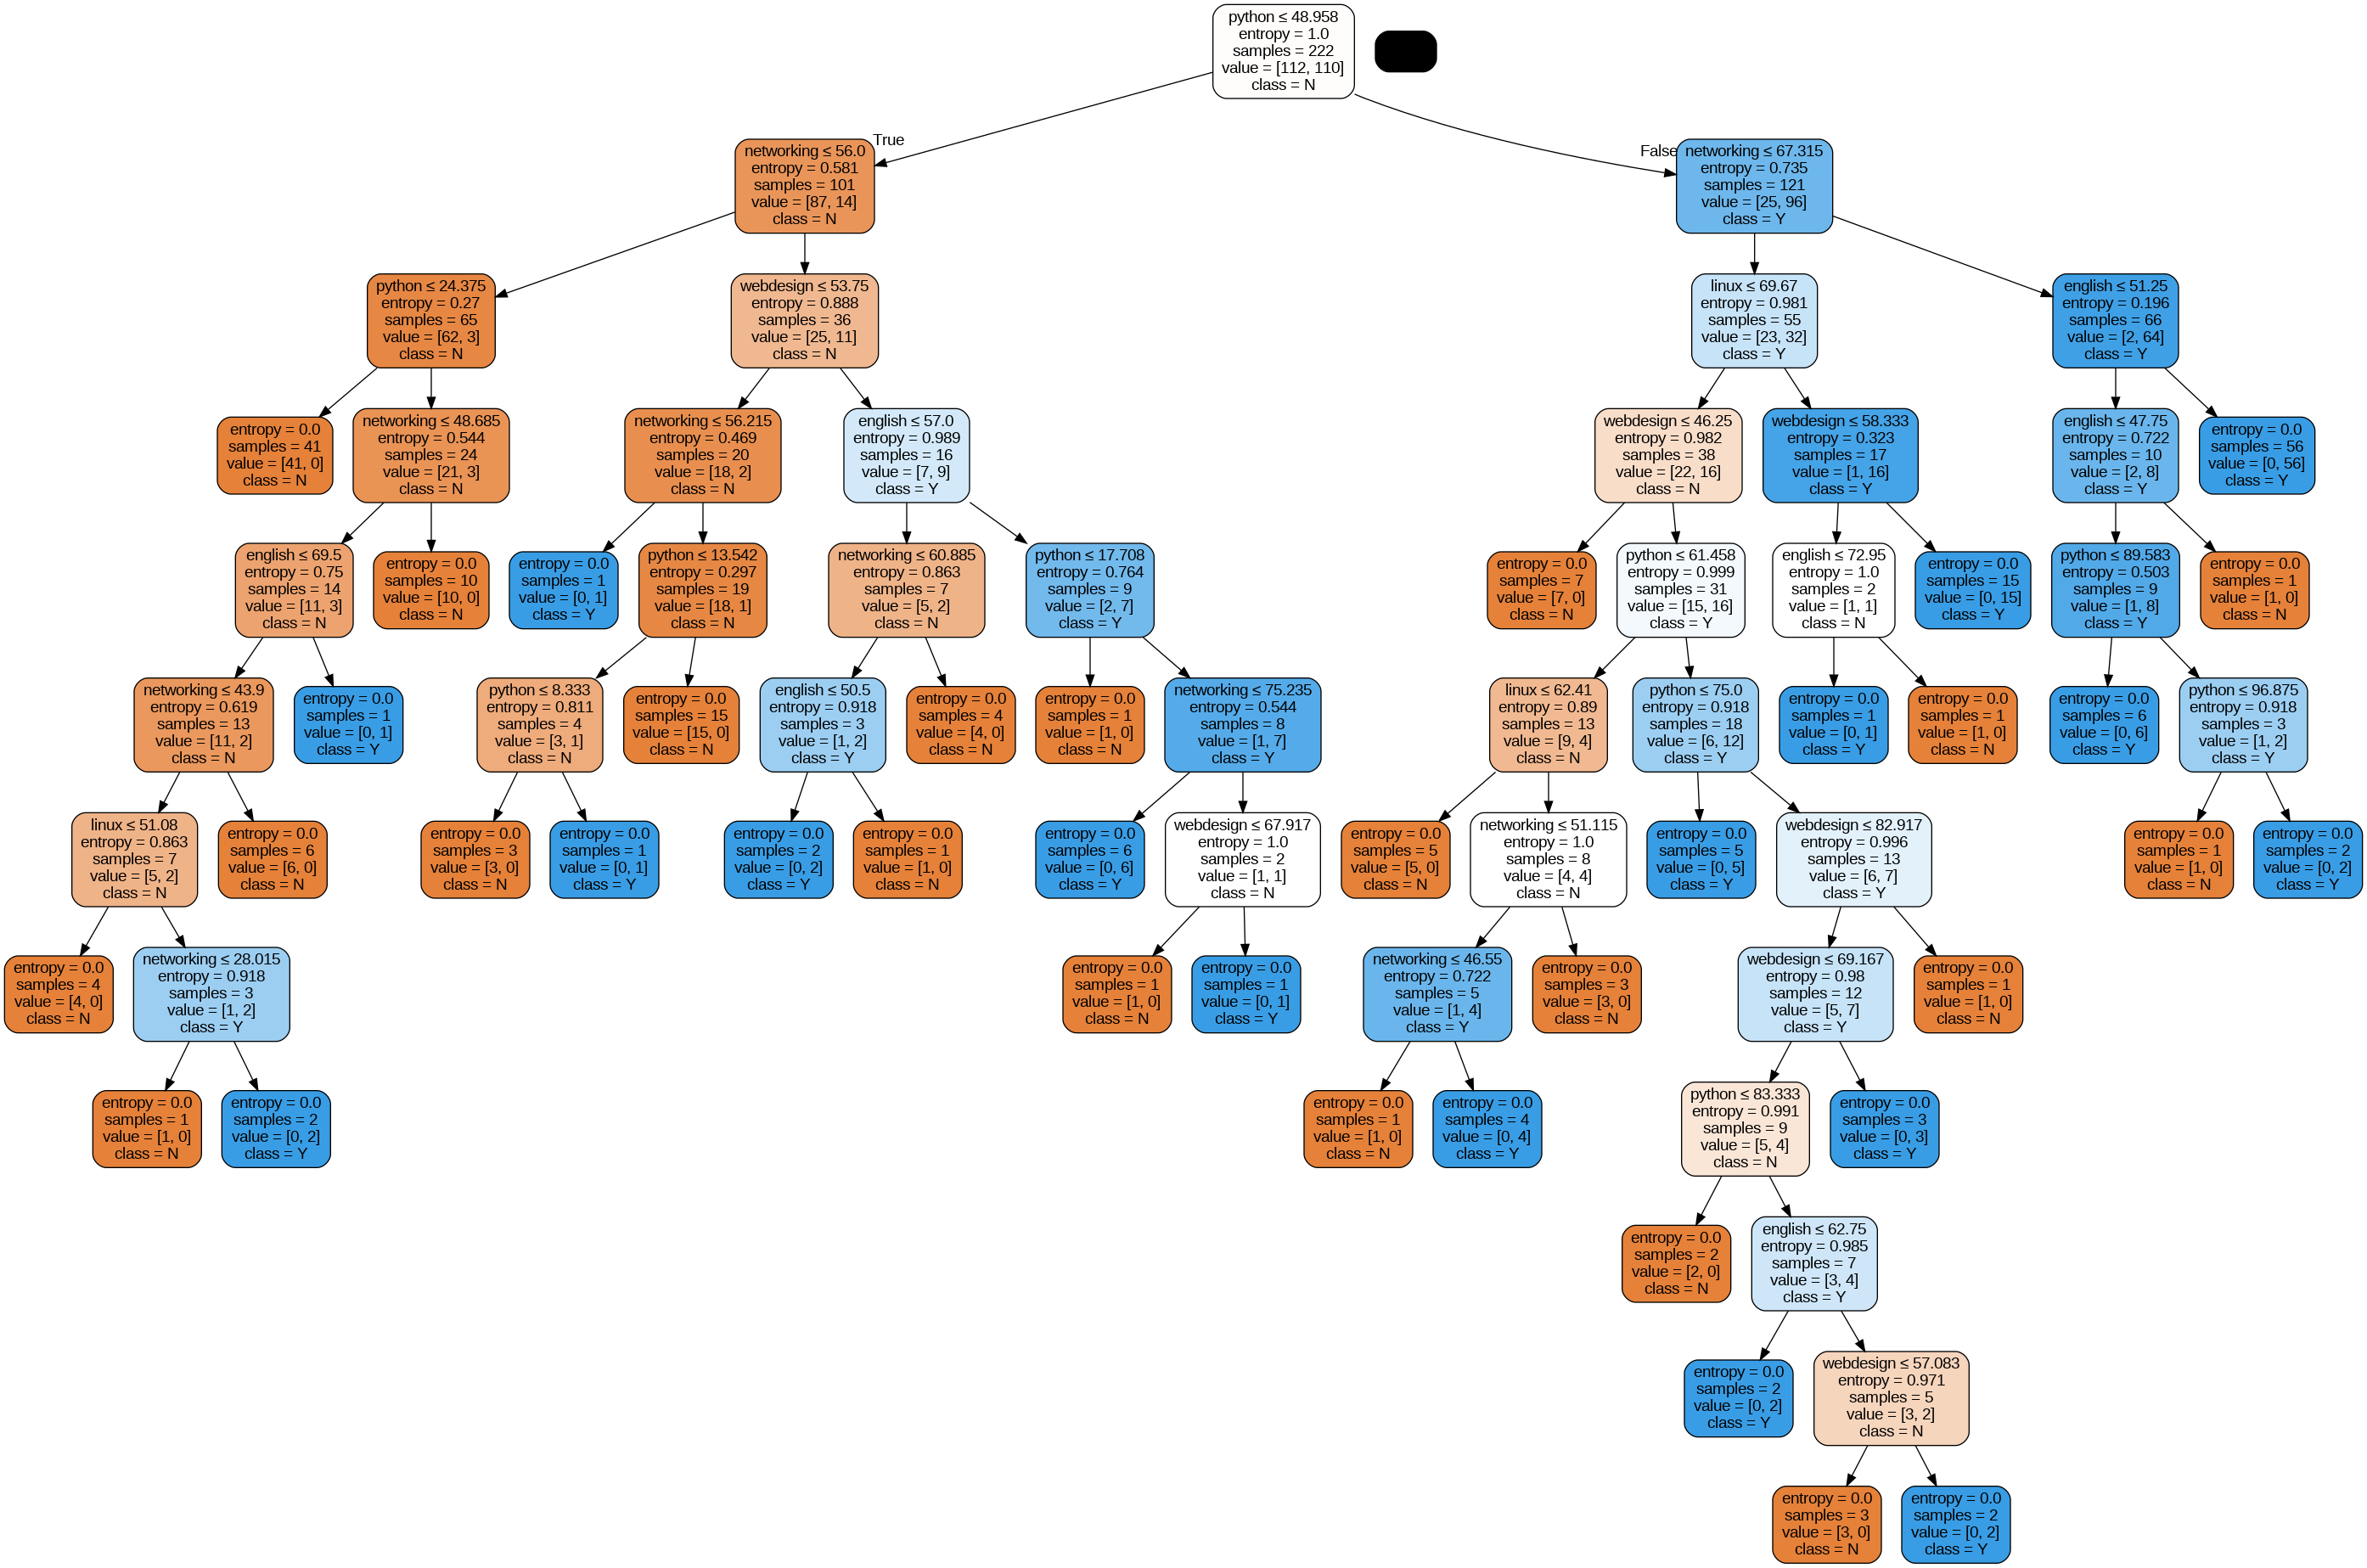

In [16]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


# print the decision tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['N', 'Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 550)

In [17]:
# create a decision tree with gini
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X,y)

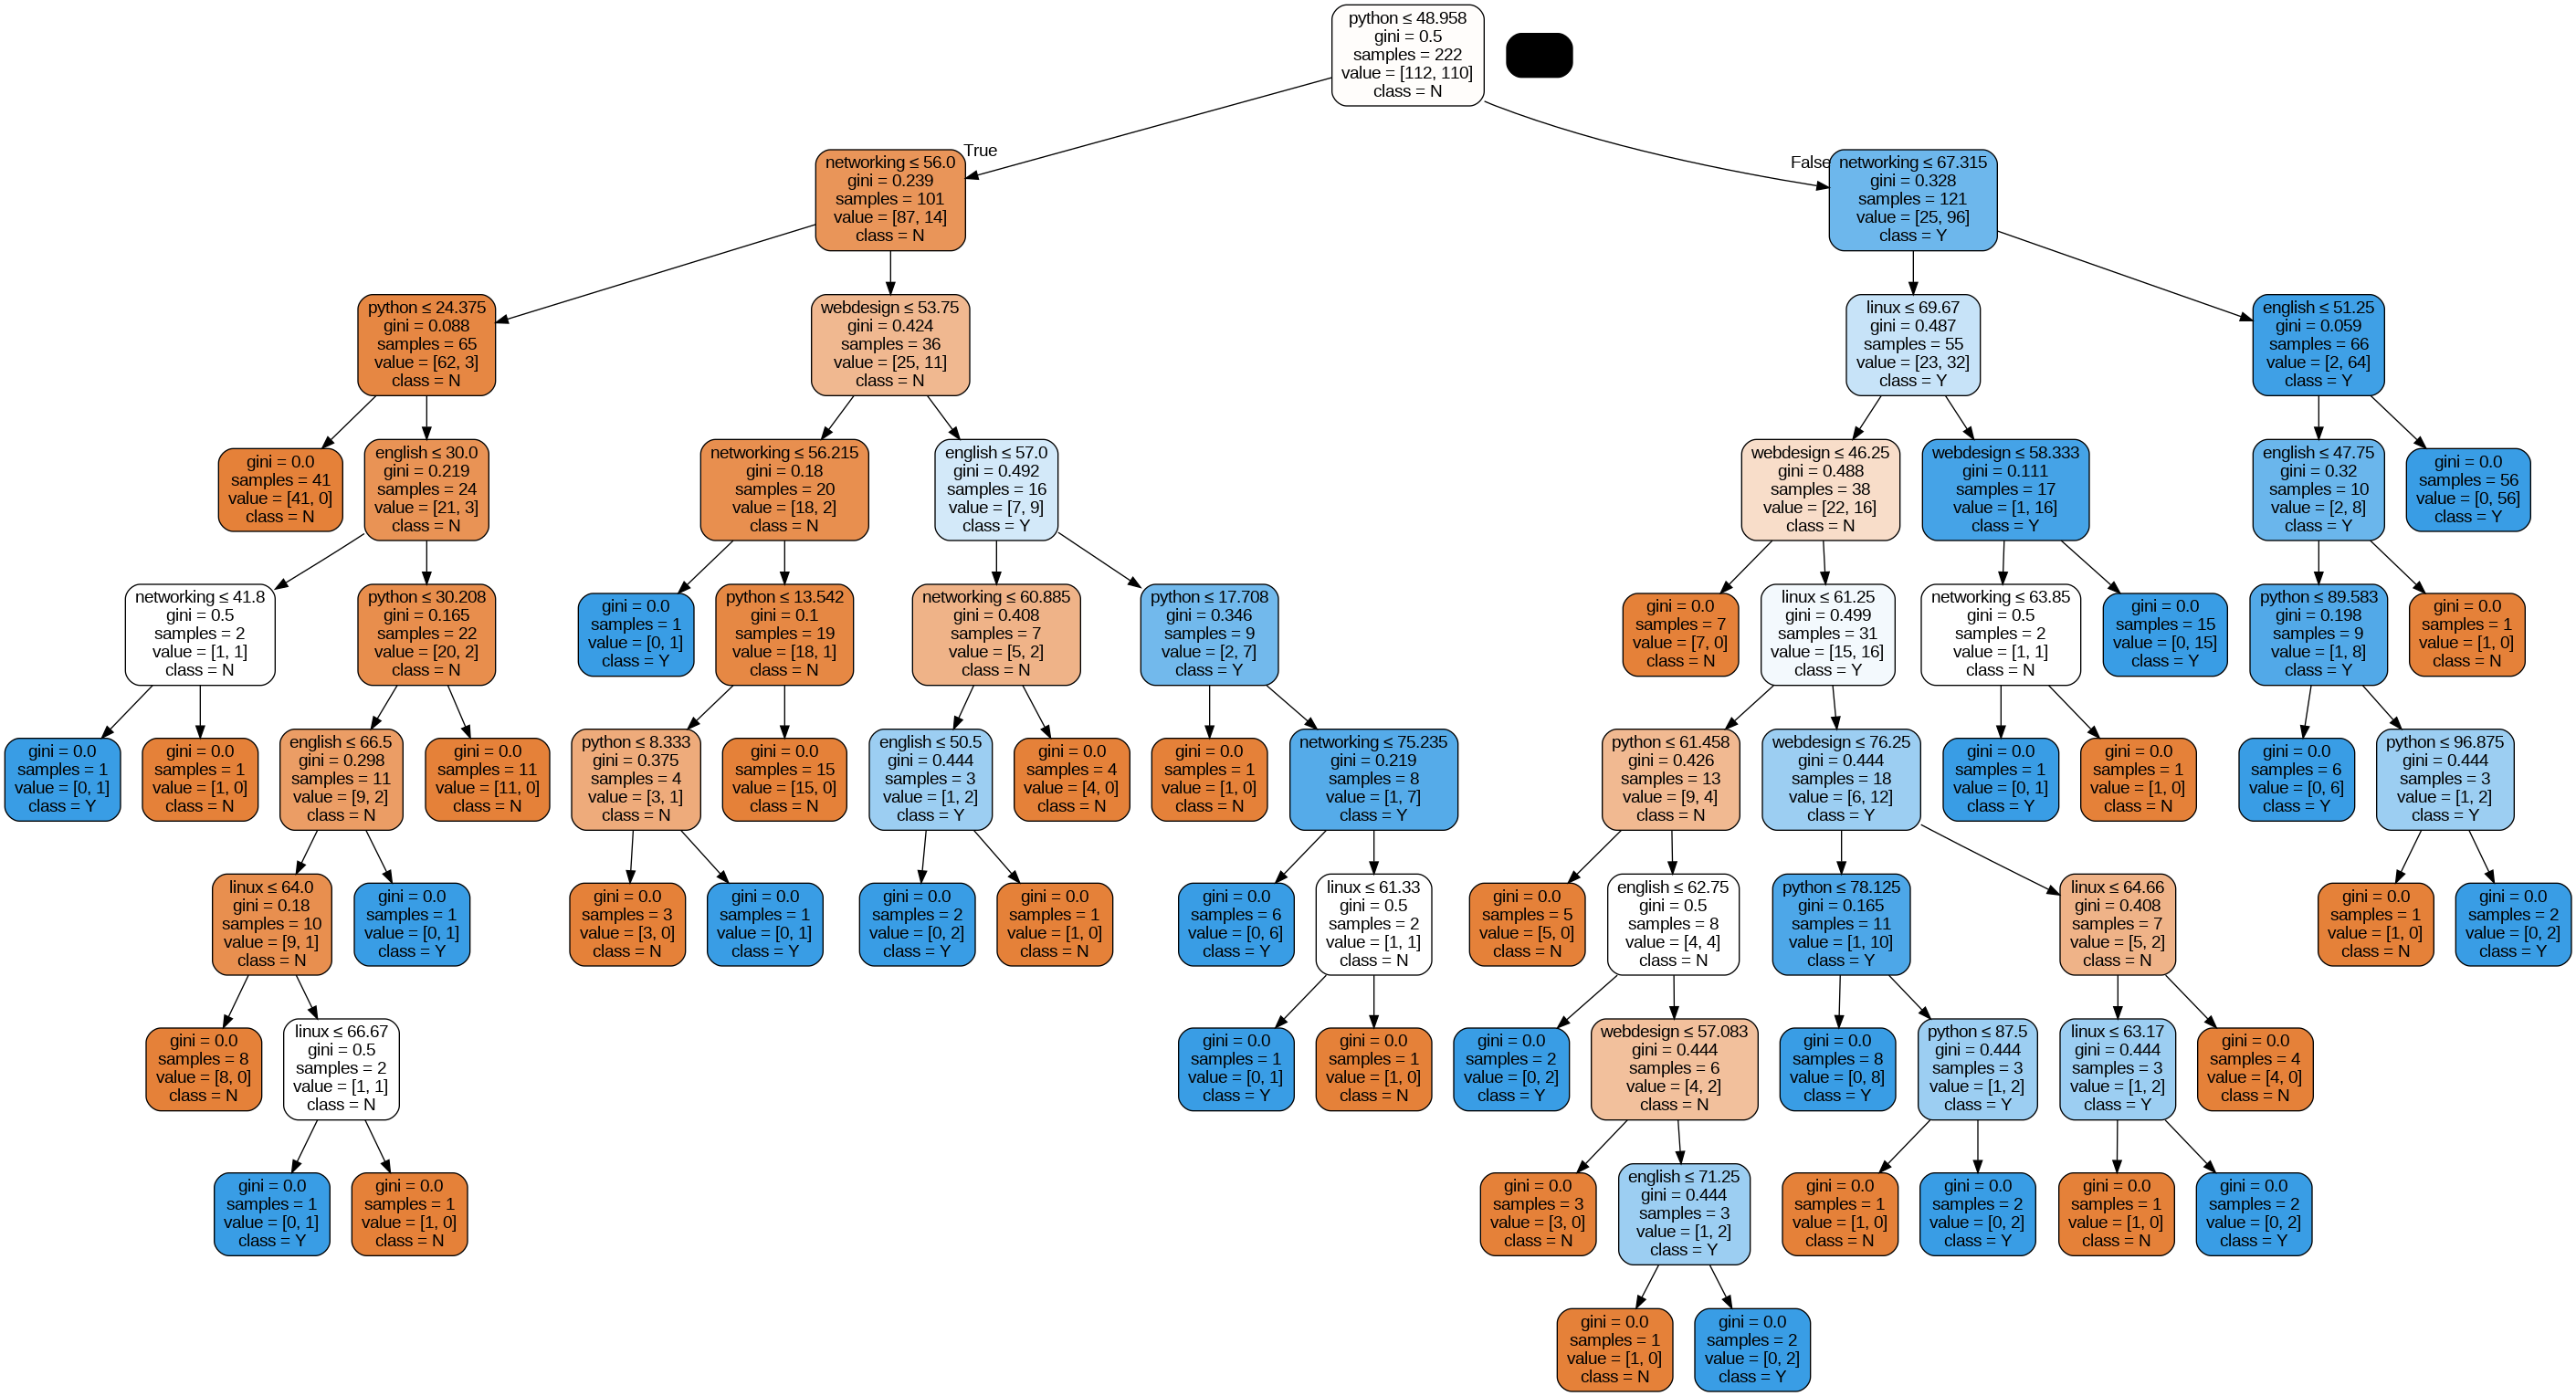

In [18]:
# print the decision tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['N', 'Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 550)

## 4. Make predictions

Can you predict if the following students will be in the third year or not according to the two classifiers?

<table>
    <tr><th>python</th><th>webdesign</th><th>linux</th><th>networking</th><th>english</th></tr>
    <tr><td>52.91</td><td>41.66</td><td>80</td><td>43.18</td><td>59.01</td></tr>
           <tr><td>61.78</td><td>53.52</td><td>43</td><td>10.56</td><td>61.5</td></tr>
           <tr><td>42.45</td><td>49.47</td><td>53</td><td>24.03</td><td>50.32</td></tr>
           <tr><td>62.84</td><td>44.46</td><td>45</td><td>68.03</td><td>50.32</td></tr>
           <tr><td>63.45</td><td>51.66</td><td>52</td><td>53.03</td><td>40</td></tr>
</table>

In [21]:
#first student
prediction1E = clf_entropy.predict([[52.91, 41.66,80, 43.18, 59.01]])
prediction1G = clf_gini.predict([[52.91, 41.66,80, 43.18, 59.01]])
print(prediction1E)
print(prediction1G)

#second student
prediction2E = clf_entropy.predict([[61.78, 53.52,43, 10.56, 61.5]])
prediction2G = clf_gini.predict([[61.78, 53.52,43, 10.56, 61.5]])
print(prediction2E)
print(prediction2G)

#third student
prediction3E = clf_entropy.predict([[42.45, 49.47,53, 24.03, 50.32]])
prediction3G = clf_gini.predict([[42.45, 49.47,53, 24.03, 50.32]])
print(prediction3E)
print(prediction3G)

#fourth student
prediction4E = clf_entropy.predict([[62.84, 44.46,45, 68.03, 50.32]])
prediction4G = clf_gini.predict([[62.84, 44.46,45, 68.03, 50.32]])
print(prediction4E)
print(prediction4G)

#5th student
prediction5E = clf_entropy.predict([[63.45, 51.66,52, 53.03, 40]])
prediction5G = clf_gini.predict([[63.45, 51.66,52, 53.03, 40]])
print(prediction5E)
print(prediction5G)


['Y']
['Y']
['Y']
['Y']
['N']
['N']
['N']
['N']
['Y']
['Y']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X